In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
%matplotlib inline
from matplotlib import figure
import os 
from citipy import citipy
import json
import requests
from config import api_key
import random
from pprint import pprint
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns

In [2]:
#In this module I create an object with all the cities in it
cities=[]
for i in range(1,50000):
    lt=random.randrange(-90,90,1)
    ln=random.randrange(-180,180,1)
    cities.append(citipy.nearest_city(lt, ln))

In [3]:
#A list of all the cities without duplicates
city_names=[]
for city in cities:
    city_names.append(city.city_name)
city_names

def remove(duplicates): 
    citiex = [] 
    for cityx in duplicates: 
        if cityx not in citiex: 
            citiex.append(cityx) 
    return citiex
final_cities=remove(city_names)

In [4]:
#The API is called 
weather_resp=[]
for i in range(0,len(final_cities)):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = final_cities[i]
    query_url = url + "appid=" + "a013bd326ab1cd551e9064d36ed0db9b" + "&q=" + city
    response = requests.get(query_url).json()
    weather_resp.append(response)

In [5]:
df=pd.DataFrame.from_records(weather_resp)

In [6]:
#Some cities are not found in the OpenWeather website
df_final=df[df.cod==200].copy()
df_final=df_final.reset_index()

In [39]:
tempF=[]
lat=[]
lon=[]
hum=[]
cloud=[]
wind=[]
city_name=df_final["name"].tolist()
city_ID=df_final["id"].tolist()
i=0
for i in range(0,len(df_final)):
    var_temp=df_final["main"][i].get("temp")*(9/5)-459.67
    tempF.append(var_temp)
    var_cloud=df_final["clouds"][i].get("all")
    cloud.append(var_cloud)
    var_hum=df_final["main"][i].get("humidity")
    hum.append(var_hum)
    var_wind=df_final["wind"][i].get("speed")
    wind.append(var_wind)
    var_lat=df_final["coord"][i].get("lat")
#     if var_lat<0:
#         var_lat=var_lat*-1
    lat.append(var_lat)
    var_lon=df_final["coord"][i].get("lon")
    lon.append(var_lon)
    
data_dict={"City":city_name,"city_ID":city_ID,"latitud":lat,"longitud":lon,"Temperature_(F)":tempF,"Humidity":hum,
           "Wind_Speed":wind,"Cloudiness_(%)":cloud}
dataF=pd.DataFrame(data_dict)
dataF.head()

,City,city_ID,latitud,longitud,Temperature_(F),Humidity,Wind_Speed,Cloudiness_(%)
0,Mount Gambier,2156643.0,-37.83,140.78,47.624,95,1.285,0
1,Esperance,2071860.0,-33.86,121.89,50.000,93,2.100,40
2,Mataura,6201424.0,-46.19,168.86,48.992,95,0.450,100
3,Vaini,1273574.0,15.34,74.49,79.106,83,2.122,43
4,Punta Arenas,3874787.0,-53.16,-70.91,46.004,65,8.490,14


In [35]:
dataF.info()
dataF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4865 entries, 0 to 4864
Data columns (total 8 columns):
City               4865 non-null object
city_ID            4865 non-null float64
latitud            4865 non-null float64
longitud           4865 non-null float64
Temperature_(F)    4865 non-null float64
Humidity           4865 non-null int64
Wind_Speed         4865 non-null float64
Cloudiness_(%)     4865 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 304.1+ KB


,city_ID,latitud,longitud,Temperature_(F),Humidity,Wind_Speed,Cloudiness_(%)
count,4.865000e+03,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000,4865.000000
mean,2.508396e+06,23.638006,16.376302,64.346647,67.040082,3.298368,51.955807
std,1.661963e+06,28.500405,79.157518,19.380682,23.227021,2.233307,37.617769
min,1.417700e+04,-54.810000,-179.170000,-4.396000,1.000000,0.059000,0.000000
25%,1.259243e+06,2.270000,-57.630000,48.398000,52.000000,1.549000,17.000000
50%,2.155562e+06,30.360000,23.920000,68.414000,71.000000,2.807000,54.000000
75%,3.522788e+06,47.080000,77.790000,80.042000,86.000000,4.479000,90.000000
max,8.142546e+06,78.220000,179.320000,104.072000,100.000000,16.004000,100.000000


,city_ID,latitud,longitud,Temperature_(F),Humidity,Wind_Speed,Cloudiness_(%)
city_ID,1.000000,0.000430,-0.690822,-0.308172,0.330775,-0.137325,0.017640
latitud,0.000430,1.000000,0.014917,-0.542828,0.121763,-0.009209,0.044386
longitud,-0.690822,0.014917,1.000000,0.048937,-0.155362,0.090638,0.024544
Temperature_(F),-0.308172,-0.542828,0.048937,1.000000,-0.406465,0.035121,-0.166782
Humidity,0.330775,0.121763,-0.155362,-0.406465,1.000000,-0.160307,0.418113
Wind_Speed,-0.137325,-0.009209,0.090638,0.035121,-0.160307,1.000000,0.003451
Cloudiness_(%),0.017640,0.044386,0.024544,-0.166782,0.418113,0.003451,1.000000


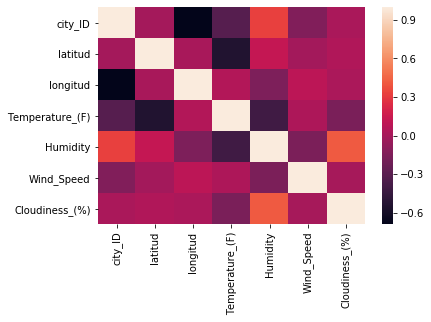

In [43]:
corr = dataF.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
dataF.corr()

Here we can see a heatmap showing the correlation existing between the different variables. There is barely any correlation between Wind Speed, Cloudiness and Lattitude, some what between Humidity and certainly a clear correlation between Temperature  and Lattitude.

In [9]:
html = dataF.to_html()

#write html to file
text_file = open("csv_file.html", "w")
text_file.write(html)
text_file.close()

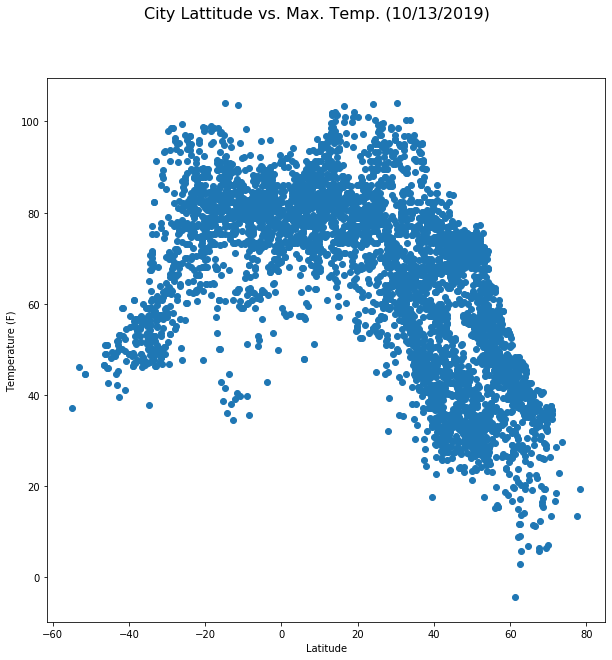

In [10]:
fig = plt.figure(figsize=(10,10))
plt.scatter(lat,tempF)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
fig.suptitle("City Lattitude vs. Max. Temp. (10/13/2019)",fontsize=16)
plt.savefig("temp.jpg")

ANALYSIS
As expected it can be seen the temperature rises from the polos to the Equator, it is interesting to notice the absolute value of slope of the south hemisphere is greater than the slope of the north hemisphere, meaning the temperature rises faster the closer the cities are to the Equator. The highest temperatures do not occur at 0 lattitude as expected, in both hemisphere happen around 20 grades from the Equator. Curious also the amount of cities that can be found in the north hemisphere vs. the amount of the cities in the south hemisphere, especially getting closer to the poles, the population density is greater in the north hemisphere, probably due to the 

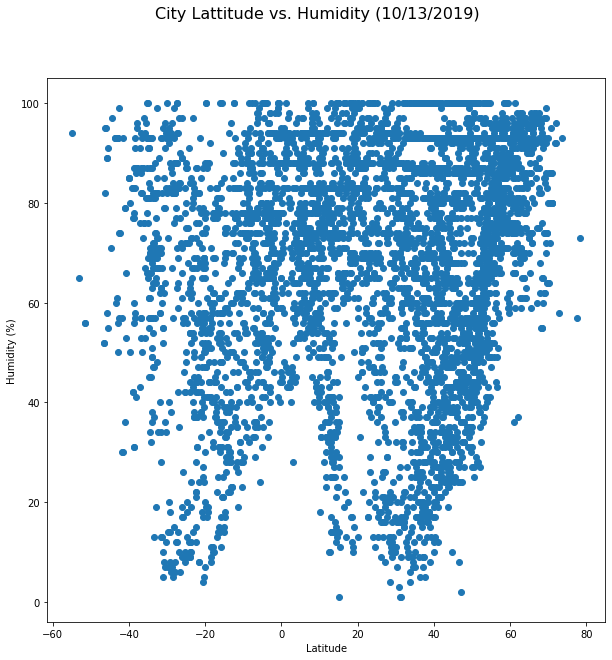

In [11]:
fig=plt.figure(figsize=(10,10))
plt.scatter(lat,hum)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
fig.suptitle("City Lattitude vs. Humidity (10/13/2019)",fontsize=16)
plt.savefig("hum.jpg")

Cities located around the Equator have a humidity average twice much, ranging between 40% - 100%. Worth noticing the clear pattern created between Lattitudes 40 to 70 where humidity increases linearly.

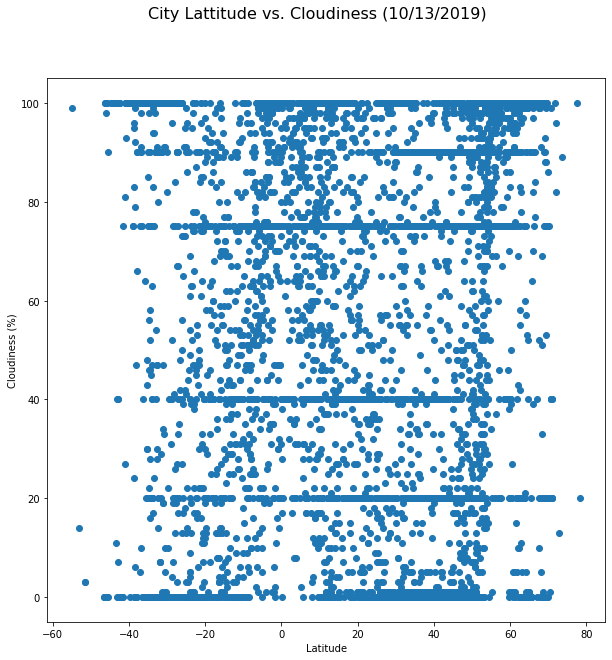

In [12]:
fig=plt.figure(figsize=(10,10))
plt.scatter(lat,cloud)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
fig.suptitle("City Lattitude vs. Cloudiness (10/13/2019)",fontsize=16)
plt.savefig("cloud.jpg")

It is interesting to me the aglutination of measurements in certain values, 0%, 20%, 40%, 75%, 90% and 100%. I wonder if it has to do with the way those values are measured. Cloudiness is a variable that seems not to be a function of Lattitude. Worth noticing the concentration of Cities around the 50 grades Latitude.

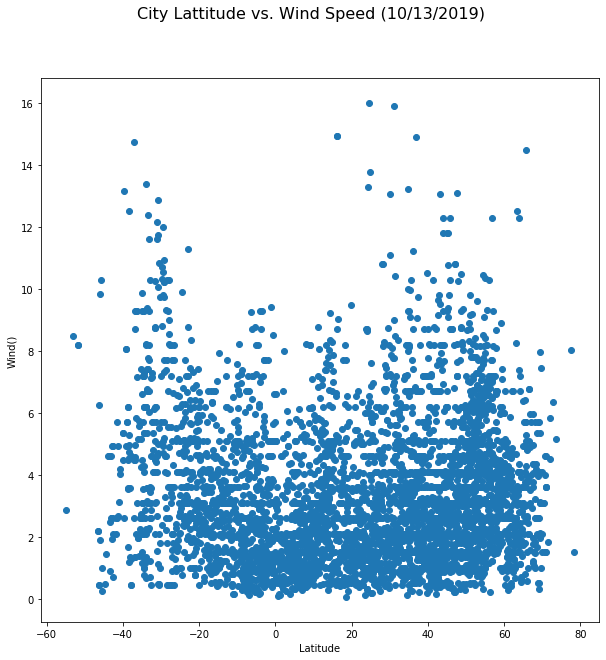

In [13]:
fig=plt.figure(figsize=(10,10))
plt.scatter(lat,wind)
plt.ylabel("Wind()")
plt.xlabel("Latitude")
fig.suptitle("City Lattitude vs. Wind Speed (10/13/2019)",fontsize=16)
plt.savefig("windi.jpg")

Wind Speed shows a tendency to reduce when approaching the Equator and increase when getting closer to the poles, of course there are outliers that would need to be consider if doing a deeper analysis.

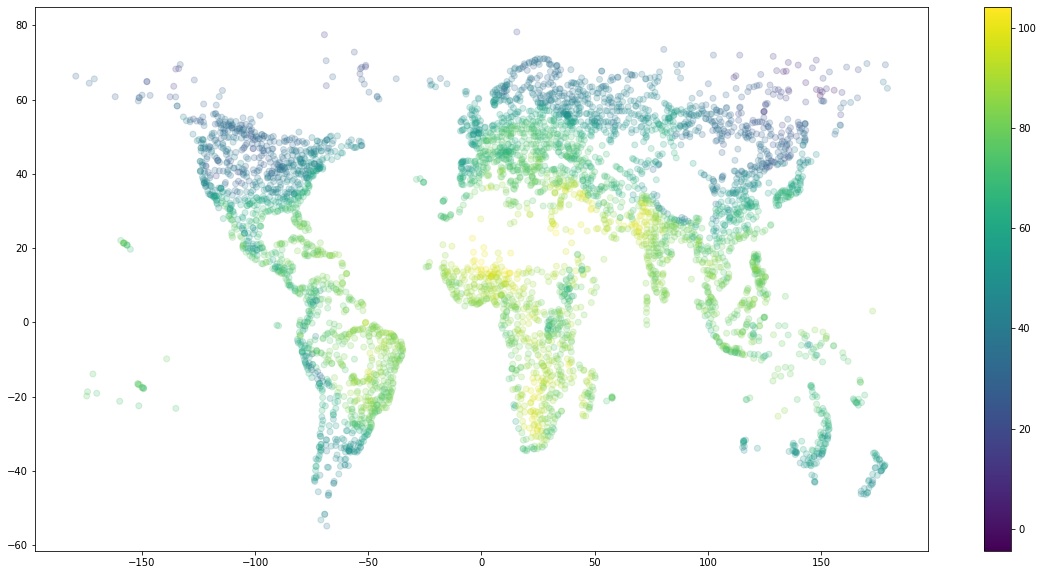

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

cmap = matplotlib.cm.get_cmap('viridis')
normalize = matplotlib.colors.Normalize(vmin=min(dataF["Temperature_(F)"]), vmax=max(dataF["Temperature_(F)"]))
colors = [cmap(normalize(value)) for value in dataF["Temperature_(F)"]]

ax.scatter(x=dataF["longitud"],y=dataF["latitud"],alpha=0.2,color=colors)

cax, _ = matplotlib.colorbar.make_axes(ax)
cbar = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=normalize)
plt.savefig("ax.jpg")

Text(0.5, 1.0, 'City Lattitude vs. Max. Temp. North Hemisphere')

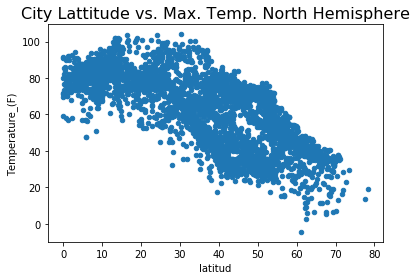

In [50]:
dataN=dataF[dataF["latitud"]>0]
dataN.plot.scatter(x="latitud",y="Temperature_(F)")
plt.title("City Lattitude vs. Max. Temp. North Hemisphere",fontsize=16)

In [46]:
X_N=dataN[['latitud']]
y_N=dataN[['Temperature_(F)']]
X2 = sm.add_constant(X_N)
est = sm.OLS(y_N, X2)
print(est.fit().f_pvalue)
est2=est.fit()
print(est2.summary())

0.0
                            OLS Regression Results                            
Dep. Variable:        Temperature_(F)   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     4244.
Date:                Mon, 14 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:02:33   Log-Likelihood:                -14933.
No. Observations:                3705   AIC:                         2.987e+04
Df Residuals:                    3703   BIC:                         2.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.2436      0.510    178.846     

Text(0.5, 1.0, 'City Lattitude vs. Max. Temp. South Hemisphere')

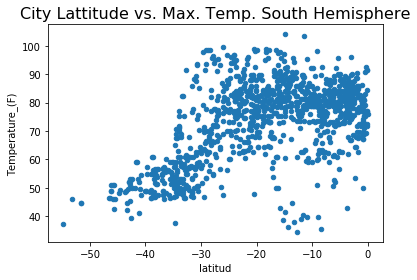

In [51]:
dataS=dataF[dataF["latitud"]<0]
dataS.plot.scatter(x="latitud",y="Temperature_(F)")
plt.title("City Lattitude vs. Max. Temp. South Hemisphere",fontsize=16)

In [47]:
X_S=dataS[['latitud']]
y_S=dataS[['Temperature_(F)']]
X2 = sm.add_constant(X_S)
est_S = sm.OLS(y_S, X2)
print(est_S.fit().f_pvalue)
est2=est_S.fit()
print(est2.summary())

5.96438387286908e-90
                            OLS Regression Results                            
Dep. Variable:        Temperature_(F)   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     484.3
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           5.96e-90
Time:                        12:03:57   Log-Likelihood:                -4473.2
No. Observations:                1160   AIC:                             8950.
Df Residuals:                    1158   BIC:                             8960.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.7285      0.59

The North hemisphere shows a better correlation, the R-squared (not ideally) is 0.534 compared to 0.295 of the south Hemisphere, as stated before, it can be seen the absolute value of the slope calculated for the south hemisphere is lower than the slope for the north hemisphere, contrary of what can be observed, this might be part of the error of the model.